**Aly Swidan   3433**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances 
from mpl_toolkits.mplot3d import Axes3D
import seaborn

### The k means implementation and some helpers

In [50]:
def normalized(X):
    return (X - np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X, axis=0))
    
def rel_diff(x, y):
    return abs(x-y)/max(x,y)

def k_means(points, k=3, threshold=0.001, max_iters=100, dist_func='euclidean'):
    '''
        returns a numpy array with the centroid of each point at its index in the
        points array, and an array containing the centroids
    '''
    
    dist = {'euclidean':euclidean_distances, 'manhattan':manhattan_distances}[dist_func]
    # assume points are gaussian and pick k random points from the destribution as the centroids
    centroids = np.var(points, axis=0) * np.random.randn(k, points.shape[1]) + np.mean(points, axis=0)
    prev_loss = 1e9
    for i in range(max_iters):
        dists_to_centroids = dist(X=points, Y=centroids)
        assignment = np.argmin(dists_to_centroids, axis=1)
        loss = np.sum(np.linalg.norm(centroids[assignment] - points, axis=1)**2)
        if rel_diff(loss, prev_loss) <= threshold:
            break
        prev_loss = loss
        # update the centroids
        for cent_idx in range(k):
            cent_points = points[np.where(assignment==cent_idx)]
            if cent_points.shape[0] > 0: # to protect against when no points belong to the centroid
                centroids[cent_idx] = np.mean(cent_points, axis=0)
        
    return assignment, centroids, loss

def k_means_rep(points, k=3, threshold=0.001, max_iters=100, dist_func='euclidean', reps=1, ):
    min_loss = 1e9
    best_centroids, best_assignment = None, None
    for rep in range(reps):
        assignment, centroids, loss = k_means(points=points, k=k, threshold=threshold, max_iters=max_iters, dist_func=dist_func)
        if loss < min_loss:
            min_loss, best_centroids, best_assignment = loss, centroids, assignment
    return best_assignment, best_centroids, min_loss

def k_means_rep_plot(points, k=3, threshold=0.001, max_iters=100, dist_func='euclidean', reps=1,):
    point_colors = ['r','g','b','c','y','m']
    assignment, centroids, loss = k_means_rep(points, k=k, threshold=threshold, max_iters=max_iters, dist_func=dist_func, reps=reps)
    fig = plt.figure()
    ax = Axes3D(fig)
    for i in range(k):
        idx = np.where(assignment == i)
        ax.scatter(points[idx, 0], points[idx, 1], points[idx,2], c=point_colors[i], label=f'cluster {i}')
        
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], c='k', label='centroids')
    plt.legend()
    plt.show()
    return assignment, centroids, loss
        

In [51]:
data = [[0.5, 4.5, 2.5],
        [2.2, 1.5, 0.1],
        [3.9, 3.5, 1.1],
        [2.1, 1.9, 4.9],
        [0.5, 3.2, 1.2],
        [0.8, 4.3, 2.6],
        [2.7, 1.1, 3.1],
        [2.5, 3.5, 2.8],
        [2.8, 3.9, 1.5],
        [0.1, 4.1, 2.9]]
data = np.asarray(data)
print(f'data{data.shape}')

data(10, 3)


### plotting initial points

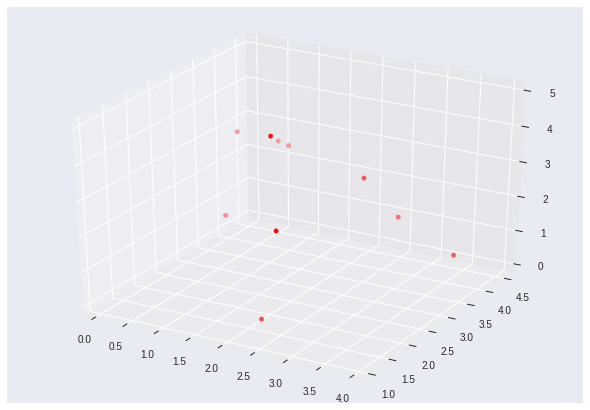

In [52]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:,2], c='r')
plt.show()

### using Euclidean distance

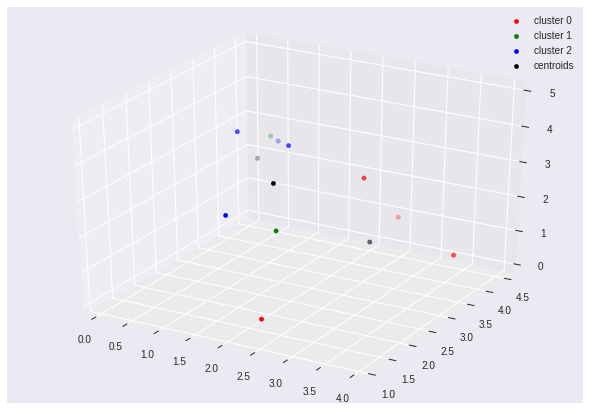

minimum loss = 13.9725
centroids = 
[[ 2.85   3.1    1.375]
 [ 2.4    1.5    4.   ]
 [ 0.475  4.025  2.3  ]]
assignment = 
[2 0 0 1 2 2 1 0 0 2]


In [53]:
assignment, centroids, loss = k_means_rep_plot(points=data, reps=50)
print(f'minimum loss = {loss}')
print(f'centroids = \n{centroids}')
print(f'assignment = \n{assignment}')

### using manhattan distance

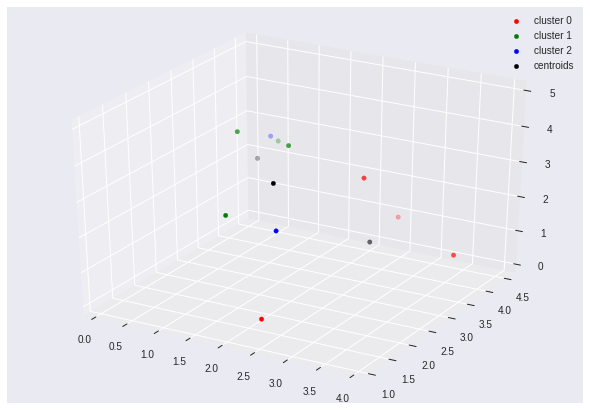

minimum loss = 13.9725
centroids = 
[[ 2.85   3.1    1.375]
 [ 0.475  4.025  2.3  ]
 [ 2.4    1.5    4.   ]]
assignment = 
[1 0 0 2 1 1 2 0 0 1]


In [54]:
assignment, centroids, loss = k_means_rep_plot(points=data, reps=50, dist_func='manhattan')
print(f'minimum loss = {loss}')
print(f'centroids = \n{centroids}')
print(f'assignment = \n{assignment}')

### normalizing the data, Euclidean Kmeans

normalized_ data = 
[[ 0.10526316  1.          0.5       ]
 [ 0.55263158  0.11764706  0.        ]
 [ 1.          0.70588235  0.20833333]
 [ 0.52631579  0.23529412  1.        ]
 [ 0.10526316  0.61764706  0.22916667]
 [ 0.18421053  0.94117647  0.52083333]
 [ 0.68421053  0.          0.625     ]
 [ 0.63157895  0.70588235  0.5625    ]
 [ 0.71052632  0.82352941  0.29166667]
 [ 0.          0.88235294  0.58333333]]


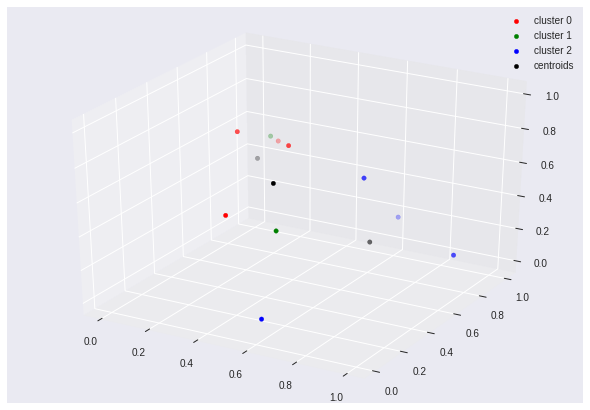

minimum loss = 0.8682241293085522
centroids = 
[[ 0.09868421  0.86029412  0.45833333]
 [ 0.60526316  0.11764706  0.8125    ]
 [ 0.72368421  0.58823529  0.265625  ]]
assignment = 
[0 2 2 1 0 0 1 2 2 0]


In [55]:
norm_data = normalized(data)
print(f'normalized_ data = \n{norm_data}')
assignment, centroids, loss = k_means_rep_plot(points=norm_data, reps=50)
print(f'minimum loss = {loss}')
print(f'centroids = \n{centroids}')
print(f'assignment = \n{assignment}')

### normalizing the data, Manhattan Kmeans

normalized_ data = 
[[ 0.10526316  1.          0.5       ]
 [ 0.55263158  0.11764706  0.        ]
 [ 1.          0.70588235  0.20833333]
 [ 0.52631579  0.23529412  1.        ]
 [ 0.10526316  0.61764706  0.22916667]
 [ 0.18421053  0.94117647  0.52083333]
 [ 0.68421053  0.          0.625     ]
 [ 0.63157895  0.70588235  0.5625    ]
 [ 0.71052632  0.82352941  0.29166667]
 [ 0.          0.88235294  0.58333333]]


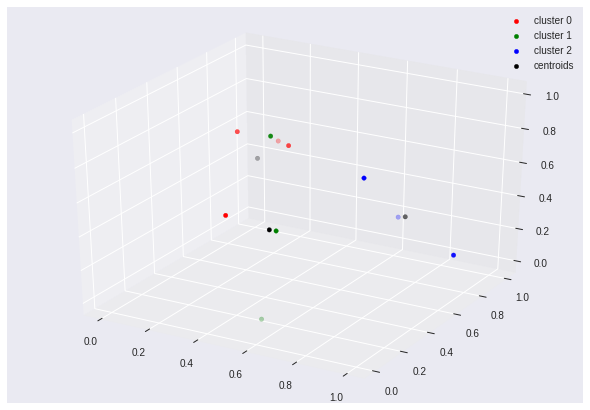

minimum loss = 0.8818164439204611
centroids = 
[[ 0.09868421  0.86029412  0.45833333]
 [ 0.5877193   0.11764706  0.54166667]
 [ 0.78070175  0.74509804  0.35416667]]
assignment = 
[0 1 2 1 0 0 1 2 2 0]


In [56]:
norm_data = normalized(data)
print(f'normalized_ data = \n{norm_data}')
assignment, centroids, loss = k_means_rep_plot(points=norm_data, reps=50, dist_func='manhattan')
print(f'minimum loss = {loss}')
print(f'centroids = \n{centroids}')
print(f'assignment = \n{assignment}')

In [57]:
data_2 = [[2,4],
          [3,3],
          [3,4],
          [5,4],
          [5,6],
          [5,8],
          [6,4],
          [6,5],
          [6,7],
          [7,3],
          [7,4],
          [8,2],
          [9,4],
          [10,6],
          [10,7],
          [10,8],
          [11,5],
          [11,8],
          [12,7],
          [13,6],
          [13,7],
          [14,6],
          [15,4],
          [15,5]]

data_2 = np.asarray(data_2)
print(f'data_2{data_2.shape}')

data_2(24, 2)


In [58]:
def get_sim_mat(X, kernel):
    sim_mat = {'linear': np.dot(X, X.T), 
              'rbf':np.exp(-euclidean_distances(X)**2),
              'polynomial':np.dot(X, X.T)**2}[kernel]
    plt.imshow(sim_mat ,cmap='Blues')
    plt.colorbar()
    plt.show()
    return sim_mat

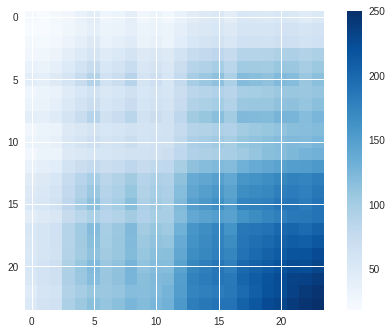

lin_sim_mat(24, 24)


In [59]:
lin_sim_mat = get_sim_mat(data_2, 'linear')
print(f'lin_sim_mat{lin_sim_mat.shape}')

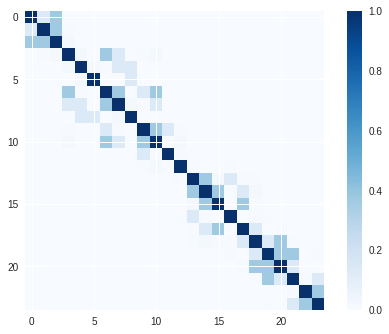

rbf_sim_mat(24, 24)


In [60]:
rbf_sim_mat = get_sim_mat(data_2, 'rbf')
print(f'rbf_sim_mat{rbf_sim_mat.shape}')

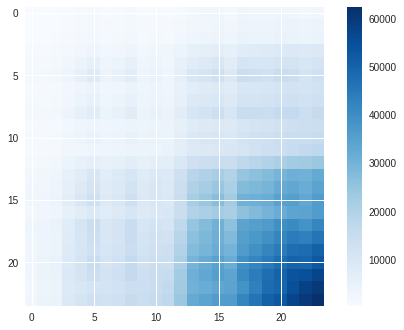

poly_sim_mat(24, 24)


In [61]:
poly_sim_mat = get_sim_mat(data_2, 'polynomial')
print(f'poly_sim_mat{poly_sim_mat.shape}')

In [62]:
data_3 = [[2,4],#p
          [3,3],#v
          [3,4],#q
          [5,4],#r
          [5,6],#h
          [6,4],#s
          [6,5],#k
          [6,7],#d
          [7,3],#w
          [7,4],#t
          [8,2],#x
          [9,4],#l
          [10,8],#b
          [11,8],#c
          [10,7],#e
          [10,6],#i
          [12,7],#f
          [13,6],#g
          [13,7],#j
          [11,5],#m
          [14,6],#n
          [5,8],#a
          [15,4],#u
          [15,5]]#o

data_3 = np.asarray(data_3)
print(f'data_3{data_3.shape}')

data_3(24, 2)


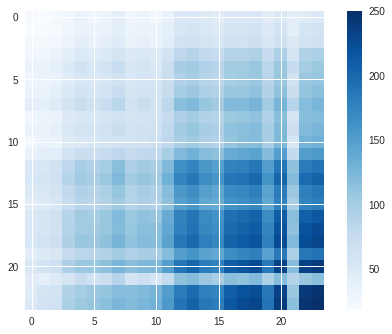

lin_sim_mat(24, 24)


In [63]:
lin_sim_mat = get_sim_mat(data_3, 'linear')
print(f'lin_sim_mat{lin_sim_mat.shape}')

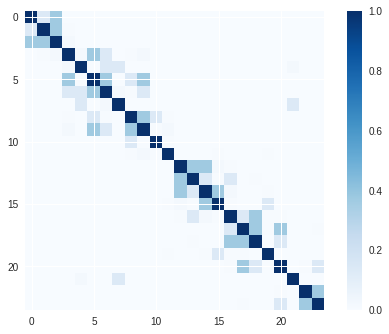

rbf_sim_mat(24, 24)


In [64]:
rbf_sim_mat = get_sim_mat(data_3, 'rbf')
print(f'rbf_sim_mat{rbf_sim_mat.shape}')

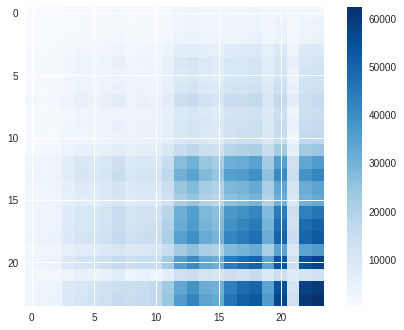

poly_sim_mat(24, 24)


In [65]:
poly_sim_mat = get_sim_mat(data_3, 'polynomial')
print(f'poly_sim_mat{poly_sim_mat.shape}')

**When the points are reordered in both linear and polynomial cases light lines appeared seperating dark blocks representing clusters, with rbf the sizes of the blocks on the diagonals increased**